

<h1 align="center"> Wish.com Product Rating Prediction </h1>
<h2 align="center"> competition #1 </h2>


---



---


# **Name:**  Sandra Girgis
# **ID:** 20399121



---



---



# Problem Statement

☘️ With the increase in commodities and the spread of online trade, some merchants need to know whether their product will be sold or not and the extent of people's admiration for their products. Therefore, some of them resort to the system of predicting product classification from 1 to 5 based on existing products and their evaluation of these products to know the evaluation of their products and Whether they will like it or not.


☘️ Therefore, **our input will be** a lot of information about a sample of the best-selling products; This information includes characteristics such as price, size, total evaluations and the producing country. Accordingly, **our output will be** the expected evaluation of that product based on what the model has been trained on. Accordingly, **the required data mining function** will be the **Classification** for Rating from 1 to 5.

☘️ And accordingly, we will also face a set of **challenges** such as inaccurate data full of noise, missing values for important data, and other values that are not important in the evaluation process, but they do exist. Therefore, we must clean the data set before working on it and extract the valuable features.

☘️ This is due to the owners of the products benefiting from knowing whether their product is of value and important to people to a large extent or not before its release, which helps in developing products and their quality and working on weaknesses in products with a low Rate.
</br>
</br>
</br>

<p align = "center"> So let's work on the data that we have to see what this problem leads us to do....😃</p>



---



---



# I.I Data Overview

### I.I.I Importing the most important libraries that used in this notebook

In [97]:
# Importing important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, RocCurveDisplay, recall_score, accuracy_score, precision_score, roc_curve, roc_auc_score

from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import plot_roc_curve

## I.I.II Loading dataset from CSV file

In [98]:
train_data = pd.read_csv('train_new.csv')
test_data = pd.read_csv('test_new.csv')

## I.I.III Saving a copy of the data

In [99]:
df_train = train_data.copy()
df_test = test_data.copy()

# II Data Visualisation

## II.I Describing The Data

In [100]:
train_data.head(6)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
5,14.00,51,EUR,100,0,4.0,36,0,0,0,...,pashesa,"(16,885 notes)",16885,3.897898,58a6f41a96f1bb57840b0ed4,0,NaN,summer,2020-08,633


In [101]:
train_data.shape

(1094, 34)

In [102]:
train_data.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393,772.207495
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445,453.784430
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000,382.250000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,752.500000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000,1166.500000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


In [103]:
train_data.nunique()

price                            117
retail_price                      95
currency_buyer                     1
units_sold                        13
uses_ad_boosts                     2
rating                             6
rating_count                     584
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                             895
product_color                     87
product_variation_size_id         83
product_variation_inventory       47
shipping_option_name              13
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              83
inventory_total                    6
has_urgency_banner                 1
urgency_text                       2
origin_country                     5
merchant_title                   747
merchant_name                    746
merchant_info_subtitle           808
merchant_rating_count            718
m

#### ⚫ **OBSERVATION**
♦ There are some unique values so we should drop them

### II.II.I See How many missing data points we have

In [104]:
train_data.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

In [105]:
test_data.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

####⚫ **OBSERVATION** 
♦ The number of null values is not very high so it can be handeled

### II.II.II Checking data duplication

In [106]:
train_data.duplicated().sum()

0

#### ⚫ **OBSERVATION**
♦ There is no duplicated values



##II.II Correlation Matrix between Featues

In [107]:
# x = train_data.loc[train_data.columns != 'rating']
y = train_data.loc[:, 'rating']
x_list = train_data.loc[:, train_data.columns != 'rating']
# print(x_list)

Text(0.5, 1.0, 'Correlation Matrix')

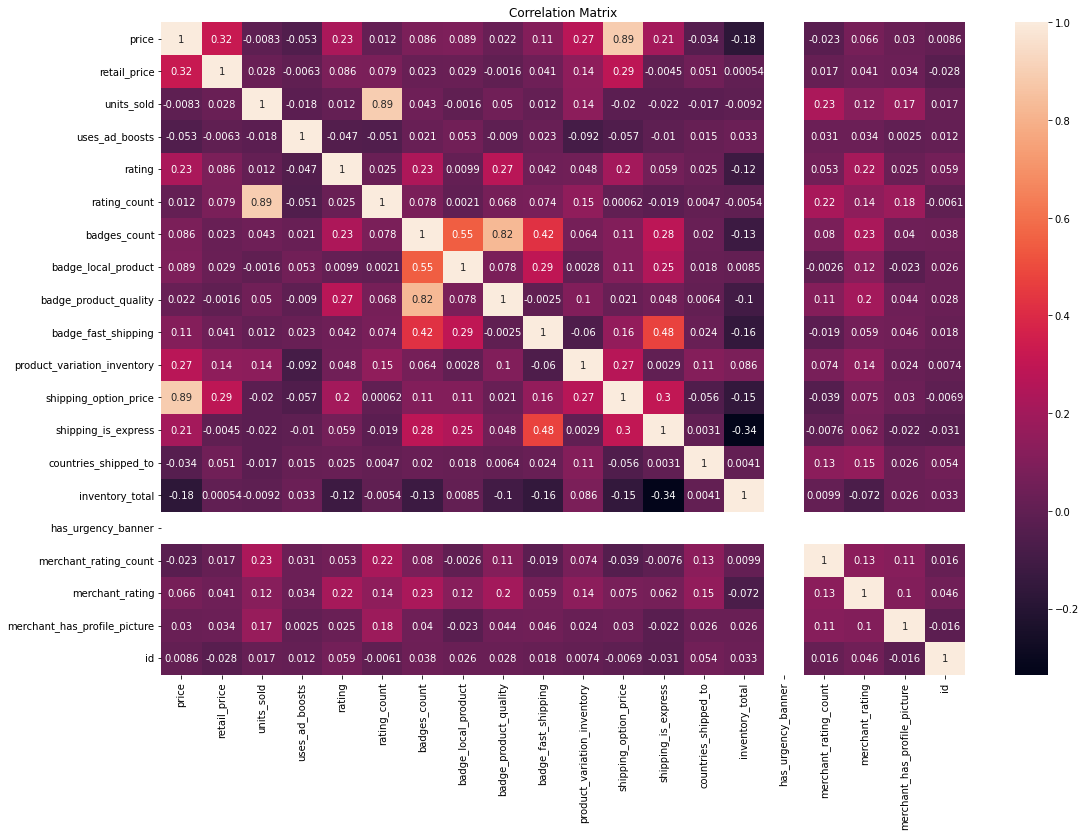

In [108]:
plt.rcParams["figure.figsize"] = (18,12) # Custom figure size in inches
sns.heatmap(train_data.corr(), annot =True)
plt.title('Correlation Matrix')

#### **⚫ OBSERVATION** 
 
 ♦ There is a high positive correlation between price and retail price

 ♦ No correlation between price and units sold

 ♦ Most columns have ouliers


In [109]:
#New dataframe to calculate correlation between numeric features
# corr_df=train_data  
# cor= corr_df.corr()
# print(cor)

In [110]:
# fig, ax =plt.subplots(figsize=(18, 18))
# plt.title("Correlation Plot")
# sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)
# plt.show()

## II.III Plotting Rating column

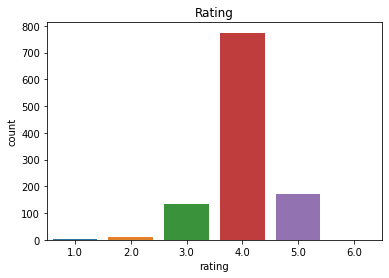

In [111]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='rating', data=train_data)
plt.title("Rating")
plt.show()

# III Data Preprocessing 

## III.I Handeling Missing values and Null values


In [112]:
train_data['product_color'].unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
       'armygreen', 'lightblue', nan, 'coffee', 'grey', 'skyblue',
       'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
       'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
       'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
       'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentg

In [113]:
# Handeling Product Color column

BLUE = ["Blue", "navyblue", "lakeblue", "lightblue", "skyblue", "navy blue", "navyblue & white", "violet", "darkblue", "blue & pink", "denimblue", "purple", "navy", "blue", "prussianblue", "lightpurple"]
YELLOW = ["yellow", "lightyellow", "brown & yellow", "winered & yellow"]
WHITE = ["white", "White", "white & green", "whitefloral", "whitestripe", "white & black", "offwhite", "white & red", ""]
RED = ["winered", "red", "RED", "watermelonred", "rosered", "lightred", "wine red", "Rose red", "wine", "burgundy", "claret", "coralred", "red & blue"]
GRAY = ["gray", "lightgray", "grey", "lightgrey", "gray & white"]
PINK = ["lightpink", "pink", "pink & black", "pink & white", "pink & blue", "Pink", "dustypink", "pink & grey", "rose", "floral"]
BROWN = ["brown", "nude", "camel", "beige", "khaki", "coffee", "lightkhaki"]
GREEN = ["mintgreen", "army", "green", "armygreen", "lightgreen", "darkgreen", "Army green", "fluorescentgreen", "applegreen", "camouflage", "light green", "army green"]
BLACK = ["black", "Black", "black & yellow", "black & blue", "black & green", "black & white", "coolblack", "blackwhite", "black & stripe", "offblack"]
ORANGE = ["orange", "orange-red", "apricot", "orange & camouflage"] 
OTHER = ["multicolor", "leopard", "silver", "rainbow", "leopardprint", "ivory", "greysnakeskinprint", "jasper", "tan", "gold", "rosegold", "star"]

# Handeling Train Data

train_data['product_color'].replace(BLUE, 'BLUE',inplace=True)
train_data['product_color'].replace(YELLOW, 'YELLOW',inplace=True)
train_data['product_color'].replace(WHITE, 'WHITE',inplace=True)
train_data['product_color'].replace(RED, 'RED',inplace=True)
train_data['product_color'].replace(GRAY, 'GRAY',inplace=True)
train_data['product_color'].replace(BROWN, 'BROWN',inplace=True)
train_data['product_color'].replace(PINK, 'PINK',inplace=True)
train_data['product_color'].replace(GREEN, 'GREEN',inplace=True)
train_data['product_color'].replace(BLACK, 'BLACK',inplace=True)
train_data['product_color'].replace(ORANGE, 'ORANGE',inplace=True)
train_data['product_color'].replace(OTHER, 'OTHER_COLOUR',inplace=True)
train_data['product_variation_size_id'] = train_data['product_variation_size_id'].fillna('OTHER_COLOUR')

# Handeling Test Data

test_data['product_color'].replace(BLUE, 'BLUE',inplace=True)
test_data['product_color'].replace(YELLOW, 'YELLOW',inplace=True)
test_data['product_color'].replace(WHITE, 'WHITE',inplace=True)
test_data['product_color'].replace(RED, 'RED',inplace=True)
test_data['product_color'].replace(GRAY, 'GRAY',inplace=True)
test_data['product_color'].replace(BROWN, 'BROWN',inplace=True)
test_data['product_color'].replace(PINK, 'PINK',inplace=True)
test_data['product_color'].replace(GREEN, 'GREEN',inplace=True)
test_data['product_color'].replace(BLACK, 'BLACK',inplace=True)
test_data['product_color'].replace(ORANGE, 'ORANGE',inplace=True)
test_data['product_color'].replace(OTHER, 'OTHER_COLOUR',inplace=True)
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].fillna('OTHER_COLOUR')


In [114]:
train_data['product_color'].value_counts()

BLACK           235
WHITE           190
BLUE            162
GREEN            98
RED              95
PINK             87
YELLOW           72
GRAY             56
BROWN            28
OTHER_COLOUR     23
ORANGE           19
Name: product_color, dtype: int64

In [115]:
test_data['product_color'].value_counts()

BLACK           86
WHITE           84
BLUE            59
RED             49
GREEN           43
PINK            38
YELLOW          37
GRAY            29
BROWN           16
ORANGE          14
OTHER_COLOUR    12
Name: product_color, dtype: int64

In [116]:
train_data['product_color'].unique()

array(['YELLOW', 'BLACK', 'WHITE', 'BLUE', 'ORANGE', 'BROWN', 'RED',
       'GREEN', 'OTHER_COLOUR', 'PINK', nan, 'GRAY'], dtype=object)

In [117]:
train_data['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'XL', '26(Waist 72cm 28inch)', 'S.',
       'S(bust 88cm)', 'XXS', 's', '29', 'OTHER_COLOUR', 'choose a size',
       'XXXS', 'Base Coat', 'Size M', 'XXL', 'M.', 'XS.',
       '100 x 100cm(39.3 x 39.3inch)', '2pcs', '4XL', '1', '25-S',
       'Size-XXS', '5PAIRS', '35', 'Pack of 1', 'Size S', 'Size-S', '6XL',
       '25', 'S/M(child)', '60', 'Size-XS', 'S (waist58-62cm)',
       'SIZE XXS', '10 ml', 'X   L', 'Women Size 36', '04-3XL',
       'Size -XXS', '1 pc.', 'Floating Chair for Kid', 'S Pink', '34',
       'US-S', 'Size XXS', 'pants-S', 'XXXXL', 'SIZE-XXS', 'SIZE XS',
       '1pc', 'Size S.', '100 cm', 'S..', 'Round', '4-5 Years', '5', '33',
       '30 cm', '2', 'XXXXXL', '20PCS-10PAIRS', '2XL', 'Size-5XL',
       'Size4XL', 'One Size', 'size S', 'Size/S', 'B', 'SizeL', '20pcs',
       '1 PC - XL', 'Suit-S', 'Base & Top & Matte Top Coat',
       'Baby Float Boat', '1m by 3m', 'SIZE S', 'White', '40 cm', '5XL',
       '10pcs', 'H01'], dtype=object)

In [118]:
# Handeling product_variation_size_id column
M = ["M", "Size M", "M.", "S/M(child)", "daughter 24M", "Women Size 37"]
S  = ["S", "s", "pants-S", "SIZE S", "S (waist58-62cm)","S(bust 88cm)", "Suit-S", "Size/S", "size S", "S..", "Size S.", "Size S", "Size-S", "S.", "US-S", "25-S", "S Pink", "35", "Women Size 36", "36", "Size--S", "S(Pink & Black)"]
XS = ["XS", "XXS", "XXXS", "Size-XS", "Size-XXS", "Size -XXS", "Size XXS", "SIZE-XXS", "SIZE XS","SIZE XXS", "XS.", "34", "33", "25"]
L = ["L", "SizeL", "1", "'Pack of 1", "One Size", "L.", "Size-L", "32/L"]
XL = ["XL", "X   L", "1 PC - XL"]
XXL = ["XXL", "4XL", "6XL", "04-3XL", "5XL", "Size4XL", "Size-5XL", "2XL", "XXXXXL", "2", "5", "XXXXL", "XXXL", "3XL", "SIZE-4XL"]
OTHER = ["10 ml", "29", "2pcs", "Round", "10pcs", "40 cm", "White", "1m by 3m", "Baby Float Boat", "Base & Top & Matte Top Coat", "20pcs", "B", "20PCS-10PAIRS", "30 cm", "4-5 Years", "100 cm", "choose a size", "1pc", "Floating Chair for Kid", "1 pc.", "26(Waist 72cm 28inch)", "60", "Pack of 1", "5PAIRS", "100 x 100cm(39.3 x 39.3inch)", "Base Coat", "H01", "EU 35", "80 X 200 CM", "4", "100pcs", "first  generation", "S Diameter 30cm", "17", "AU plug Low quality", "3 layered anklet", "US 6.5 (EU 37)", "US5.5-EU35", "EU39(US8)"]

# Handeling Train Data

train_data['product_variation_size_id'].replace(S, 'S',inplace=True)
train_data['product_variation_size_id'].replace(M, 'M',inplace=True)
train_data['product_variation_size_id'].replace(XS, 'XS',inplace=True)
train_data['product_variation_size_id'].replace(L, 'L',inplace=True)
train_data['product_variation_size_id'].replace(XXL, 'XXL',inplace=True)
train_data['product_variation_size_id'].replace(XL, 'XL',inplace=True)
train_data['product_variation_size_id'].replace(OTHER, 'OTHER_SIZE',inplace=True)
train_data['product_variation_size_id'] = train_data['product_variation_size_id'].fillna('OTHER_SIZE')

# Handeling Test Data

test_data['product_variation_size_id'].replace(S, 'S',inplace=True)
test_data['product_variation_size_id'].replace(M, 'M',inplace=True)
test_data['product_variation_size_id'].replace(XS, 'XS',inplace=True)
test_data['product_variation_size_id'].replace(L, 'L',inplace=True)
test_data['product_variation_size_id'].replace(XXL, 'XXL',inplace=True)
test_data['product_variation_size_id'].replace(XL, 'XL',inplace=True)
test_data['product_variation_size_id'].replace(OTHER, 'OTHER_SIZE',inplace=True)
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].fillna('OTHER_SIZE')



In [119]:
train_data['product_variation_size_id'].value_counts()

S               483
XS              350
M               142
L                33
OTHER_SIZE       31
XXL              29
XL               14
OTHER_COLOUR     12
Name: product_variation_size_id, dtype: int64

In [120]:
test_data['product_variation_size_id'].value_counts()

S               212
XS              140
M                67
L                26
OTHER_SIZE       15
XXL              12
XL                5
OTHER_COLOUR      2
Name: product_variation_size_id, dtype: int64

In [121]:
train_data['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'XL', 'OTHER_SIZE', 'OTHER_COLOUR', 'XXL'],
      dtype=object)

In [122]:
train_data['origin_country'].value_counts()

CN    1054
US      22
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

In [123]:
# Handeling origin_country column
def Countries (c):
  countries = ['CN', 'US']
  if c in countries: 
    return c
  else:
    return 'OTHER_COUNTRY'

In [124]:
# Handeling Train Data
train_data['origin_country'] = train_data['origin_country'].apply(Countries)
# Handeling Test Data
test_data['origin_country'] = test_data['origin_country'].apply(Countries)

In [125]:
train_data['origin_country'].value_counts()

CN               1054
US                 22
OTHER_COUNTRY      18
Name: origin_country, dtype: int64

In [126]:
test_data['origin_country'].value_counts()

CN               462
US                 9
OTHER_COUNTRY      8
Name: origin_country, dtype: int64

In [127]:
train_data['origin_country'].unique()

array(['CN', 'US', 'OTHER_COUNTRY'], dtype=object)

In [128]:
train_data['has_urgency_banner'] = train_data['has_urgency_banner'].fillna(0)
test_data['has_urgency_banner'] = test_data['has_urgency_banner'].fillna(0)

## III.II Encoding Categorical Data 

In [129]:
product_color_data = pd.get_dummies(train_data['product_color'])
train_data = pd.concat([train_data, product_color_data], axis=1)

product_color_data = pd.get_dummies(test_data['product_color'])
test_data = pd.concat([test_data, product_color_data], axis=1)

In [130]:
product_variation_size_id_data = pd.get_dummies(train_data['product_variation_size_id'])
train_data = pd.concat([train_data, product_variation_size_id_data], axis=1)

product_variation_size_id_data = pd.get_dummies(test_data['product_variation_size_id'])
test_data = pd.concat([test_data, product_variation_size_id_data], axis=1)

In [131]:
origin_country_data = pd.get_dummies(train_data['origin_country'])
train_data = pd.concat([train_data, origin_country_data], axis=1)

origin_country_data = pd.get_dummies(test_data['origin_country'])
test_data = pd.concat([test_data, origin_country_data], axis=1)

In [132]:
train_data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,M,OTHER_COLOUR,OTHER_SIZE,S,XL,XS,XXL,CN,OTHER_COUNTRY,US
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [133]:
test_data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,M,OTHER_COLOUR,OTHER_SIZE,S,XL,XS,XXL,CN,OTHER_COUNTRY,US
0,5.75,5,EUR,10,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [134]:
train_data.nunique()

price                            117
retail_price                      95
currency_buyer                     1
units_sold                        13
uses_ad_boosts                     2
rating                             6
rating_count                     584
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                             895
product_color                     11
product_variation_size_id          8
product_variation_inventory       47
shipping_option_name              13
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              83
inventory_total                    6
has_urgency_banner                 2
urgency_text                       2
origin_country                     3
merchant_title                   747
merchant_name                    746
merchant_info_subtitle           808
merchant_rating_count            718
m

## III.III Dropping inconsequential Values

In [135]:
# Handeling Rating column
train_data.drop(train_data[(train_data['rating'] == 6)].index , inplace=True)
train_data[['rating']].value_counts()

rating
4.0       774
5.0       170
3.0       135
2.0        12
1.0         2
dtype: int64

## III.V Drop useless columns

In [136]:
train_data = train_data.drop(['shipping_is_express', 'product_color', 'origin_country', 'product_variation_size_id', 'shipping_option_name', 'theme', 'id', 'urgency_text', 'merchant_title', 'merchant_info_subtitle', 'currency_buyer', 'merchant_name', 'merchant_id', 'merchant_has_profile_picture', 'merchant_profile_picture', 'crawl_month', 'tags'],axis=1)

In [137]:
test_data = test_data.drop(['shipping_is_express', 'product_color', 'origin_country', 'product_variation_size_id', 'shipping_option_name', 'theme', 'urgency_text', 'merchant_title', 'merchant_info_subtitle', 'currency_buyer', 'merchant_name', 'merchant_id', 'merchant_has_profile_picture', 'merchant_profile_picture', 'crawl_month', 'tags'],axis=1)

In [138]:
train_data.nunique()

price                          116
retail_price                    95
units_sold                      13
uses_ad_boosts                   2
rating                           5
rating_count                   584
badges_count                     4
badge_local_product              2
badge_product_quality            2
badge_fast_shipping              2
product_variation_inventory     47
shipping_option_price            7
countries_shipped_to            83
inventory_total                  5
has_urgency_banner               2
merchant_rating_count          717
merchant_rating                741
BLACK                            2
BLUE                             2
BROWN                            2
GRAY                             2
GREEN                            2
ORANGE                           2
OTHER_COLOUR                     2
PINK                             2
RED                              2
WHITE                            2
YELLOW                           2
L                   

## III.VI Splitting Data to X and Y

In [139]:
X = train_data.loc[:, train_data.columns != 'rating']
y = train_data.loc[:, 'rating']

In [140]:
y.shape

(1093,)

## III.VII Feature Scalling 

In [141]:
#Min Max Scaler
X = MinMaxScaler().fit(X).transform(X)

## III.VIII Splitting Data To Train and Validation Dataset

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,  test_size=0.1, stratify=y, random_state = 1) 

In [ ]:
jfgknbfjkngjk

# V Building different Machine Learning models

## V.I Building Dicesion Tree Model

### V.I.I Training The Model using Hyperparameters

In [142]:
#Hyperparameters Tuning
DT_param={
    'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 3]
}

DT_model = DecisionTreeClassifier()

#Applying GridSearch
DT_grid_search = GridSearchCV(DT_model, DT_param, scoring='f1_micro')
# Training model
grid_results = DT_grid_search.fit(X_train, y_train)
final_DT_model = DT_model.set_params(**grid_results.best_params_)
#Traning model with the best parameters
final_DT_model.fit(X_train, y_train)
y_DT_val_pred = final_DT_model.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [143]:
# Finding F1-score
print("Training F1_Score:", f1_score(y_val, y_DT_val_pred, average= 'micro'))

Training F1_Score: 0.8133577310155535


In [144]:
# Finding The Accuracy
print("Training Accuracy:", accuracy_score(y_val, y_DT_val_pred ))

Training Accuracy: 0.8133577310155535


In [145]:
# Finding The best parameters that tuned the model
grid_results.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

### V.I.II Testing The Model

In [150]:
# pred_test = final_DT_model.predict(test_data.loc[:,test_data.columns != 'id'])

### V.I.III Training The Model with manually Tunning Hyperparameter

In [53]:
#DT_model_2 = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 2, min_samples_split = 3, criterion = 'entropy')
DT_model_2 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1, min_samples_split = 3, criterion = 'entropy')

DT_model_2.fit(X_train, y_train)
y_DT_val_pred_2 = DT_model_2.predict(X_val)

In [54]:
# Finding F1-score
print("Training F1_Score:", f1_score(y_val, y_DT_val_pred_2, average= 'micro'))

Training F1_Score: 0.807868252516011


In [56]:
# Finding The Accuracy
print("Training F1_Score:", accuracy_score(y_val, y_DT_val_pred_2))

Training F1_Score: 0.807868252516011


### V.I.V Testing The Model

In [ ]:
# pred_test = DT_model_2.predict(test_data.loc[:,test_data.columns != 'id'])

#### ⚫ **OBSERVATION**
♦ The model that fine tuned is more accurate than the other model 
♦ Using Grid Search CV is more accurate than tunning the hyperparamters manually

## V.II Building Gaussian Model


### V.II.I Training The Model using Hyperparameters

In [ ]:
#Hyperparameters Tuning
NB_param={'var_smoothing': np.logspace(0,-9, num=100)}

NB = GaussianNB()

#Applying GridSearch
grid_NB = GridSearchCV(NB, NB_param, scoring='f1_micro')
grid_results = grid_NB.fit(X_train, y_train)
final_NB_model = NB.set_params(**grid_results.best_params_)
final_NB_model.fit(X_train, y_train)
y_NB_val_pred = final_NB_model.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# Finding F1-score
print("Training F1_Score:", f1_score(y_val, y_NB_val_pred, average= 'micro'))

Training F1_Score: 0.7


In [ ]:
# Finding The Accuracy
print("Training Accuracy:", accuracy_score(y_val, y_NB_val_pred))

Training Accuracy: 0.7


In [ ]:
# Finding The best parameters that tuned the model
grid_results.best_params_

{'var_smoothing': 1.0}

### V.II.II Testing the model

In [ ]:
# pred_test = final_NB_model.predict(test_data.loc[:,test_data.columns != 'id'])

## V.III Building Support Vector Machine (SVM) Model


### V.III.I Training The Model using Hyperparameters

In [151]:
SVM_param = {
    "gamma": [0.01, 0.1, 1.0, 10, 100],
    "C": [0.1, 1.0, 10, 100],
    "kernel": ['linear', 'rbf', 'poly']
}

SVM_model = SVC()

#Applying GridSearch
SVM_grid_search = GridSearchCV(SVM_model, SVM_param, scoring='f1_micro')

# Training model
grid_results = SVM_grid_search.fit(X_train, y_train)
final_SVM_model = SVM_model.set_params(**grid_results.best_params_)

#Traning model with the best parameters
final_SVM_model.fit(X_train, y_train)
y_SVM_val_pred = final_SVM_model.predict(X_val)

In [ ]:
# Finding F1-score
print("Training F1_Score:", f1_score(y_val, y_SVM_val_pred, average= 'micro'))

In [ ]:
# Finding The Accuracy
print("Training Accuracy:", accuracy_score(y_val, y_SVM_val_pred))

In [ ]:
# Finding The best parameters that tuned the model
grid_results.best_params_

### V.III.II Testing The model

In [ ]:
# pred_test = final_SVM_model.predict(test_data.loc[:,test_data.columns != 'id'])

### V.III.III Training The Model with manually Tunning Hyperparameter

In [ ]:
SVM = SVC(C = 1, kernel ='linear',gamma = 0.01 )
#SVM = SVC(C = 10, kernel ='rbf',gamma = 0.1 )
SVM_model = SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_val)

In [ ]:
# Finding F1-score
print("Training F1_Score:", f1_score(y_val, y_pred_SVM, average= 'micro'))

Training F1_Score: 0.7363636363636363


In [ ]:
# Finding The Accuracy
print("Training Accuracy:", accuracy_score(y_val, y_pred_SVM))

Training Accuracy: 0.7363636363636363


###  V.III.V Testing The model

In [ ]:
# pred_test = SVM_model.predict(test_data.loc[:,test_data.columns != 'id'])

#### ⚫ **OBSERVATION**
♦ The model that fine tuned is more accurate than the other model 

♦ Using Grid Search CV is more accurate than tunning the hyperparamters manually

## V.V Buliding Random Forest Model

### V.V.I Training The Model using Hyperparameters

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
RF_model=RandomForestClassifier(random_state=42)


#Applying GridSearch
RF_grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv= 5)

# Training model
grid_results = RF_grid_search.fit(X_train, y_train)
final_RF_moddel = RF_model.set_params(**grid_results.best_params_)

#Traning model with the best parameters
final_RF_moddel.fit(X_train, y_train)
y_RF_pred=final_RF_moddel.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has

In [ ]:
# Finding F1-score
print("Training F1_Score:", f1_score(y_val, y_RF_pred, average= 'micro'))

Training F1_Score: 0.8000000000000002


In [ ]:
# Finding The Accuracy
print("Training Accuracy:", accuracy_score(y_val, y_RF_pred))

Training Accuracy: 0.8


In [ ]:
# Finding The best parameters that tuned the model
grid_results.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

### V.V.II Testing the Model

In [ ]:
pred_test = final_RF_moddel.predict(test_data.loc[:,test_data.columns != 'id'])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### V.V.III Training The Model with manually Tunning Hyperparameter

In [ ]:
#RF_grid_search_2 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 300, max_depth=8, criterion='gini')
#RF_grid_search_2 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
RF_grid_search_2 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 300, max_depth=7, criterion='entropy')

RF_grid_search_2.fit(X_train, y_train)
y_RF_pred_T = RF_grid_search_2.predict(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
# Finding F1-score
print("Training F1_Score:", f1_score(y_val, y_RF_pred_T, average= 'micro'))

Training F1_Score: 0.8000000000000002


In [ ]:
# Finding The Accuracy
print("Training Accuracy:", accuracy_score(y_val, y_RF_pred_T))

Training Accuracy: 0.8


### V.V.V Testing the model

In [ ]:
# pred_test = RF_grid_search_2.predict(test_data.loc[:,test_data.columns != 'id'])

## V.VI Saving the model in CSV file

In [148]:
pred_df = pd.DataFrame(data={'id': test_data["id"], 'rating': pred_test})
pred_df.to_csv('pred_walkthrough_6.csv', index=False)

In [149]:
pd.read_csv('/content/pred_walkthrough_6.csv')

,id,rating
0,937,5.0
1,270,4.0
2,308,4.0
3,913,4.0
4,403,4.0
...,...,...
474,1166,4.0
475,1416,4.0
476,63,4.0
477,626,4.0


#### ⚫ **OBSERVATION**

♦ If we take a look at what has been done in this blog, we may find that:

 👉🏻 Data visualisation and preprocessing data processes increased by the value of F1-score.

 👉🏻 training the model more than one trial, with more than one model , with different hyperparamters leads to produced the best results.

🔥 That was achieved in the decision tree model



---



---



#  ***VI Answering the Questions*** 😃


## 🌈 **Q1:**  Why Data Mining is a misnomer? What is another preferred name?

⭐ Data mining is a misnomer or inaccurate as it indicates that the process is about extracting data only, while data mining involves various steps such as data cleaning, data integration, data visualization, data transformation, and data analysis.

⭐ Other preferred and more accurate names for data mining are knowledge discovery (mining) in databases (KDD), knowledge mining, data/pattern analysis, data archeology, data scraping, information gathering, business intelligence, etc. , because these names more accurately describe the process of extracting useful information and knowledge from large datasets.






---



---



## 🌈 **Q2:**  What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
**👉🏻 The general knowledge discovery process includes the following steps:**

1.   Data Selection: Determining which data to use for analysis.

2.   Data Cleaning: Identifying and correcting errors or inconsistencies in the data.

3.   Data Warehouse: A decision support database that is maintained separately from the organization’s operational database.

4.   Selection: Select the data with high correlation for processing
5.   Task-relevant Data: Get the task-relevant data from the data warehouse or databases.
6.   Data Mining: Applying algorithms to identify patterns, relationships, and trends in the data.
7.   Pattern Evaluation: Assessing the patterns identified in step 5 to determine their usefulness and validity.
8.   Data Integration:  Combining data from multiple sources into a single dataset.

**👉🏻 The main difference between a data engineer and data scientist/AI engineer is:**

🔥 **Data Engineers** are focused on ensuring that data is collected, stored, and managed effectively .
They are specialized in 3 main data actions: to design, build and arrange Data “pipelines”:
1.   Design the big data infrastructure and prepare it to be analyzed.
2.   Build complex queries to create “pipelines”.
3.   Arrange any problems in the programmed system.



🔥 **Data Scientists** are focused on extracting insights and knowledge from the data to drive decision-making.
He analyses, tests, creates and presents them to the team. Data Scientists have a math and statistical background. They are also comfortable with creating machine learning and artificial intelligence models.
They have normally 4 main tasks in a company:
1.   Work on clean data
2.   Find solutions with the data available
3.   Communicate analyzes with the team
4.   Work onto solution problem and get some



---



---



## 🌈 **Q3:**  In data mining, what is the difference between prediction and categorization?
**👉🏻 The main difference between a prediction and categorization is:**

⭐  **Prediction** is like something that may go to happen in the future. And just like that in prediction, we identify or predict the missing or unavailable data for a new observation based on the previous data that we have and based on the future assumptions. In prediction, the output is a continuous value.

⭐ **Categorization** is the process of finding a good model that describes the data classes or concepts, and the purpose of Categorization is to predict the class of objects whose class label is unknown. In simple terms, we can think of Classification as categorizing the incoming new data based on our current or past assumptions that we have made and the data that we already have with us.




---



---



## 🌈 **Q4:**  Why data science/machine learning is a bad idea in the context of information security?
- Data science and machine learning are not inherently bad ideas in the context of information security, but there are some risks and challenges that make everyone think carefully before they use any information security system designed with artificial intelligence technology.
- One of the main risks is that it is difficult to verify compliance in the data and models used for analysis. If the data used to train the machine learning algorithm is inaccurate and incorrect, it will produce inaccurate or unfair results. This can be particularly problematic in the context of information security, where decisions based on inaccurate or incomplete models can lead to incorrect results.
- Another challenge is the need for privacy and security in handling sensitive data. In the context of information security, data may contain sensitive information such as passwords, financial data, or personal information that must be protected from unauthorized access or disclosure. Machine learning models may also be vulnerable to attacks such as adversarial attacks or model poisoning, which can be used to manipulate analysis results.
-In general, data science and machine learning can be powerful tools for improving information security, but they must be implemented carefully with an understanding of the unique risks and challenges involved.



---



---



## 🌈 **Q5:**  What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

- Confidentiality, integrity and availability, also known as the CIA triad, is a model designed to guide policies for information security within an organization. Although elements of the triad are three of the most foundational and crucial cybersecurity needs, experts believe the CIA triad needs an upgrade to stay effective.

- Brifly, confidentiality is a set of rules that limits access to information, integrity is the assurance that the information is trustworthy and accurate, and availability is a guarantee of reliable access to the information by authorized people.

⭐ **Confidentiality** is roughly equivalent to privacy. Confidentiality measures are designed to prevent sensitive information from unauthorized access attempts. It is common for data to be categorized according to the amount and type of damage that could be done if it fell into the wrong hands. More or less stringent measures can then be implemented according to those categories.

⭐ **Integrity** involves maintaining the consistency, accuracy and trustworthiness of data over its entire lifecycle. Data must not be changed in transit, and steps must be taken to ensure data cannot be altered by unauthorized people (for example, in a breach of confidentiality).

⭐ **Availability** means information should be consistently and readily accessible for authorized parties. This involves properly maintaining hardware and technical infrastructure and systems that hold and display the information.


🔥 Using the CIA principle, we can assess the security and privacy aspects of AI systems and pipelines by evaluating how well they protect sensitive information (confidentiality), maintain data accuracy and consistency (integrity), and ensure availability and accessibility (availability) of data and systems. This can help identify potential vulnerabilities and risks and guide the implementation of appropriate security and privacy measures to mitigate these risks.